# **Other Figures**

In [ ]:
#General Imports
import pandas as pd

#Working with Data
from functools import reduce #Get Monthly Data
from pandas.tseries.offsets import MonthEnd

#Plotting
from matplotlib.ticker import FuncFormatter, PercentFormatter
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, DateFormatter
from matplotlib import cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Data Collection**

### **1.1 Importing Fama and French Factor Data**

In [ ]:
ff5 = pd.read_csv("__data/F-F_Research_Data_5_Factors_2x3.csv", skiprows=3, index_col=0)

# Convert the index to datetime
ff5.index = pd.to_datetime(ff5.index, format='%Y%m') + MonthEnd(0)

# Remove any potential whitespace in column names
ff5.columns = ff5.columns.str.strip()

# Convert data to numeric, replacing any non-numeric values with NaN
for col in ff5.columns:
    ff5[col] = pd.to_numeric(ff5[col], errors='coerce')
    ff5[col] = ff5[col] / 100 #Divide by 100 to get actual "returns" as decimals

# Create a new "Date" column from the index
ff5["Date"] = ff5.index
ff5['Date'] = ff5["Date"].dt.date

# Sort columns and drop index
ff5 = ff5[['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']]
ff5.reset_index(drop=True, inplace=True)

# Display the first few rows of the resulting dataframe
ff5.tail()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
730,2024-05-31,0.0434,0.0076,-0.0166,0.0298,-0.0307,0.0044
731,2024-06-30,0.0277,-0.0437,-0.0331,0.0051,-0.0178,0.0041
732,2024-07-31,0.0124,0.0828,0.0573,0.0022,0.0043,0.0045
733,2024-08-31,0.0161,-0.0365,-0.0113,0.0085,0.0086,0.0048
734,2024-09-30,0.0174,-0.0103,-0.0260,0.0003,-0.0026,0.0040


### **1.2 Importing Momentum Factor Data**

In [ ]:
mom = pd.read_csv("__data/F-F_Momentum_Factor.CSV", index_col = 0)

# Convert the index to datetime
mom.index = pd.to_datetime(mom.index, format='%Y%m') + MonthEnd(0)

# Remove any potential whitespace in column names
mom.columns = mom.columns.str.strip()

# Convert data to numeric, replacing any non-numeric values with NaN
for col in mom.columns:
    mom[col] = pd.to_numeric(mom[col], errors='coerce')
    mom[col] = mom[col] / 100 #Divide by 100 to get actual "returns" as decimals

# Create a new "Date" column from the index
mom["Date"] = mom.index
mom['Date'] = mom["Date"].dt.date

mom["MOM"] = mom["Mom"]

mom = mom[["Date", "MOM"]]
mom.reset_index(drop=True, inplace=True)

# Display the first few rows of the resulting dataframe
mom.head()

,Date,MOM
0,1927-01-31,0.0036
1,1927-02-28,-0.0214
2,1927-03-31,0.0361
3,1927-04-30,0.0430
4,1927-05-31,0.0300


### **1.3 Merging Data**

In [ ]:
# Merge all datasets on the Date column
dataframes = [ff5, mom]

for df in dataframes:
    df["Date"] = pd.to_datetime(df["Date"])

#Merge data
data = reduce(lambda left, right: pd.merge(left, right, on = "Date"), dataframes)

# Display the first few rows and column names of the resulting dataframe
data.head()

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,MOM
0,1963-07-31,-0.0039,-0.0041,-0.0097,0.0068,-0.0118,0.0027,0.0090
1,1963-08-31,0.0507,-0.0080,0.0180,0.0036,-0.0035,0.0025,0.0101
2,1963-09-30,-0.0157,-0.0052,0.0013,-0.0071,0.0029,0.0027,0.0019
3,1963-10-31,0.0253,-0.0139,-0.0010,0.0280,-0.0201,0.0029,0.0312
4,1963-11-30,-0.0085,-0.0088,0.0175,-0.0051,0.0224,0.0027,-0.0074


### **1.4 Calculating Strategies**

In [ ]:
factors = ["SMB", "HML", "RMW", "CMA", "MOM"]
cumulative_returns = {factor: [1.0] for factor in factors}

for i in range(1, len(data)):
    for factor in factors:
        prev_cum_return = cumulative_returns[factor][-1]
        cumulative_returns[factor].append(prev_cum_return * (1 + data.at[i, factor]))

for factor, values in cumulative_returns.items():
    data[f"Cumulative_{factor}"] = values

## **2. Visuals**

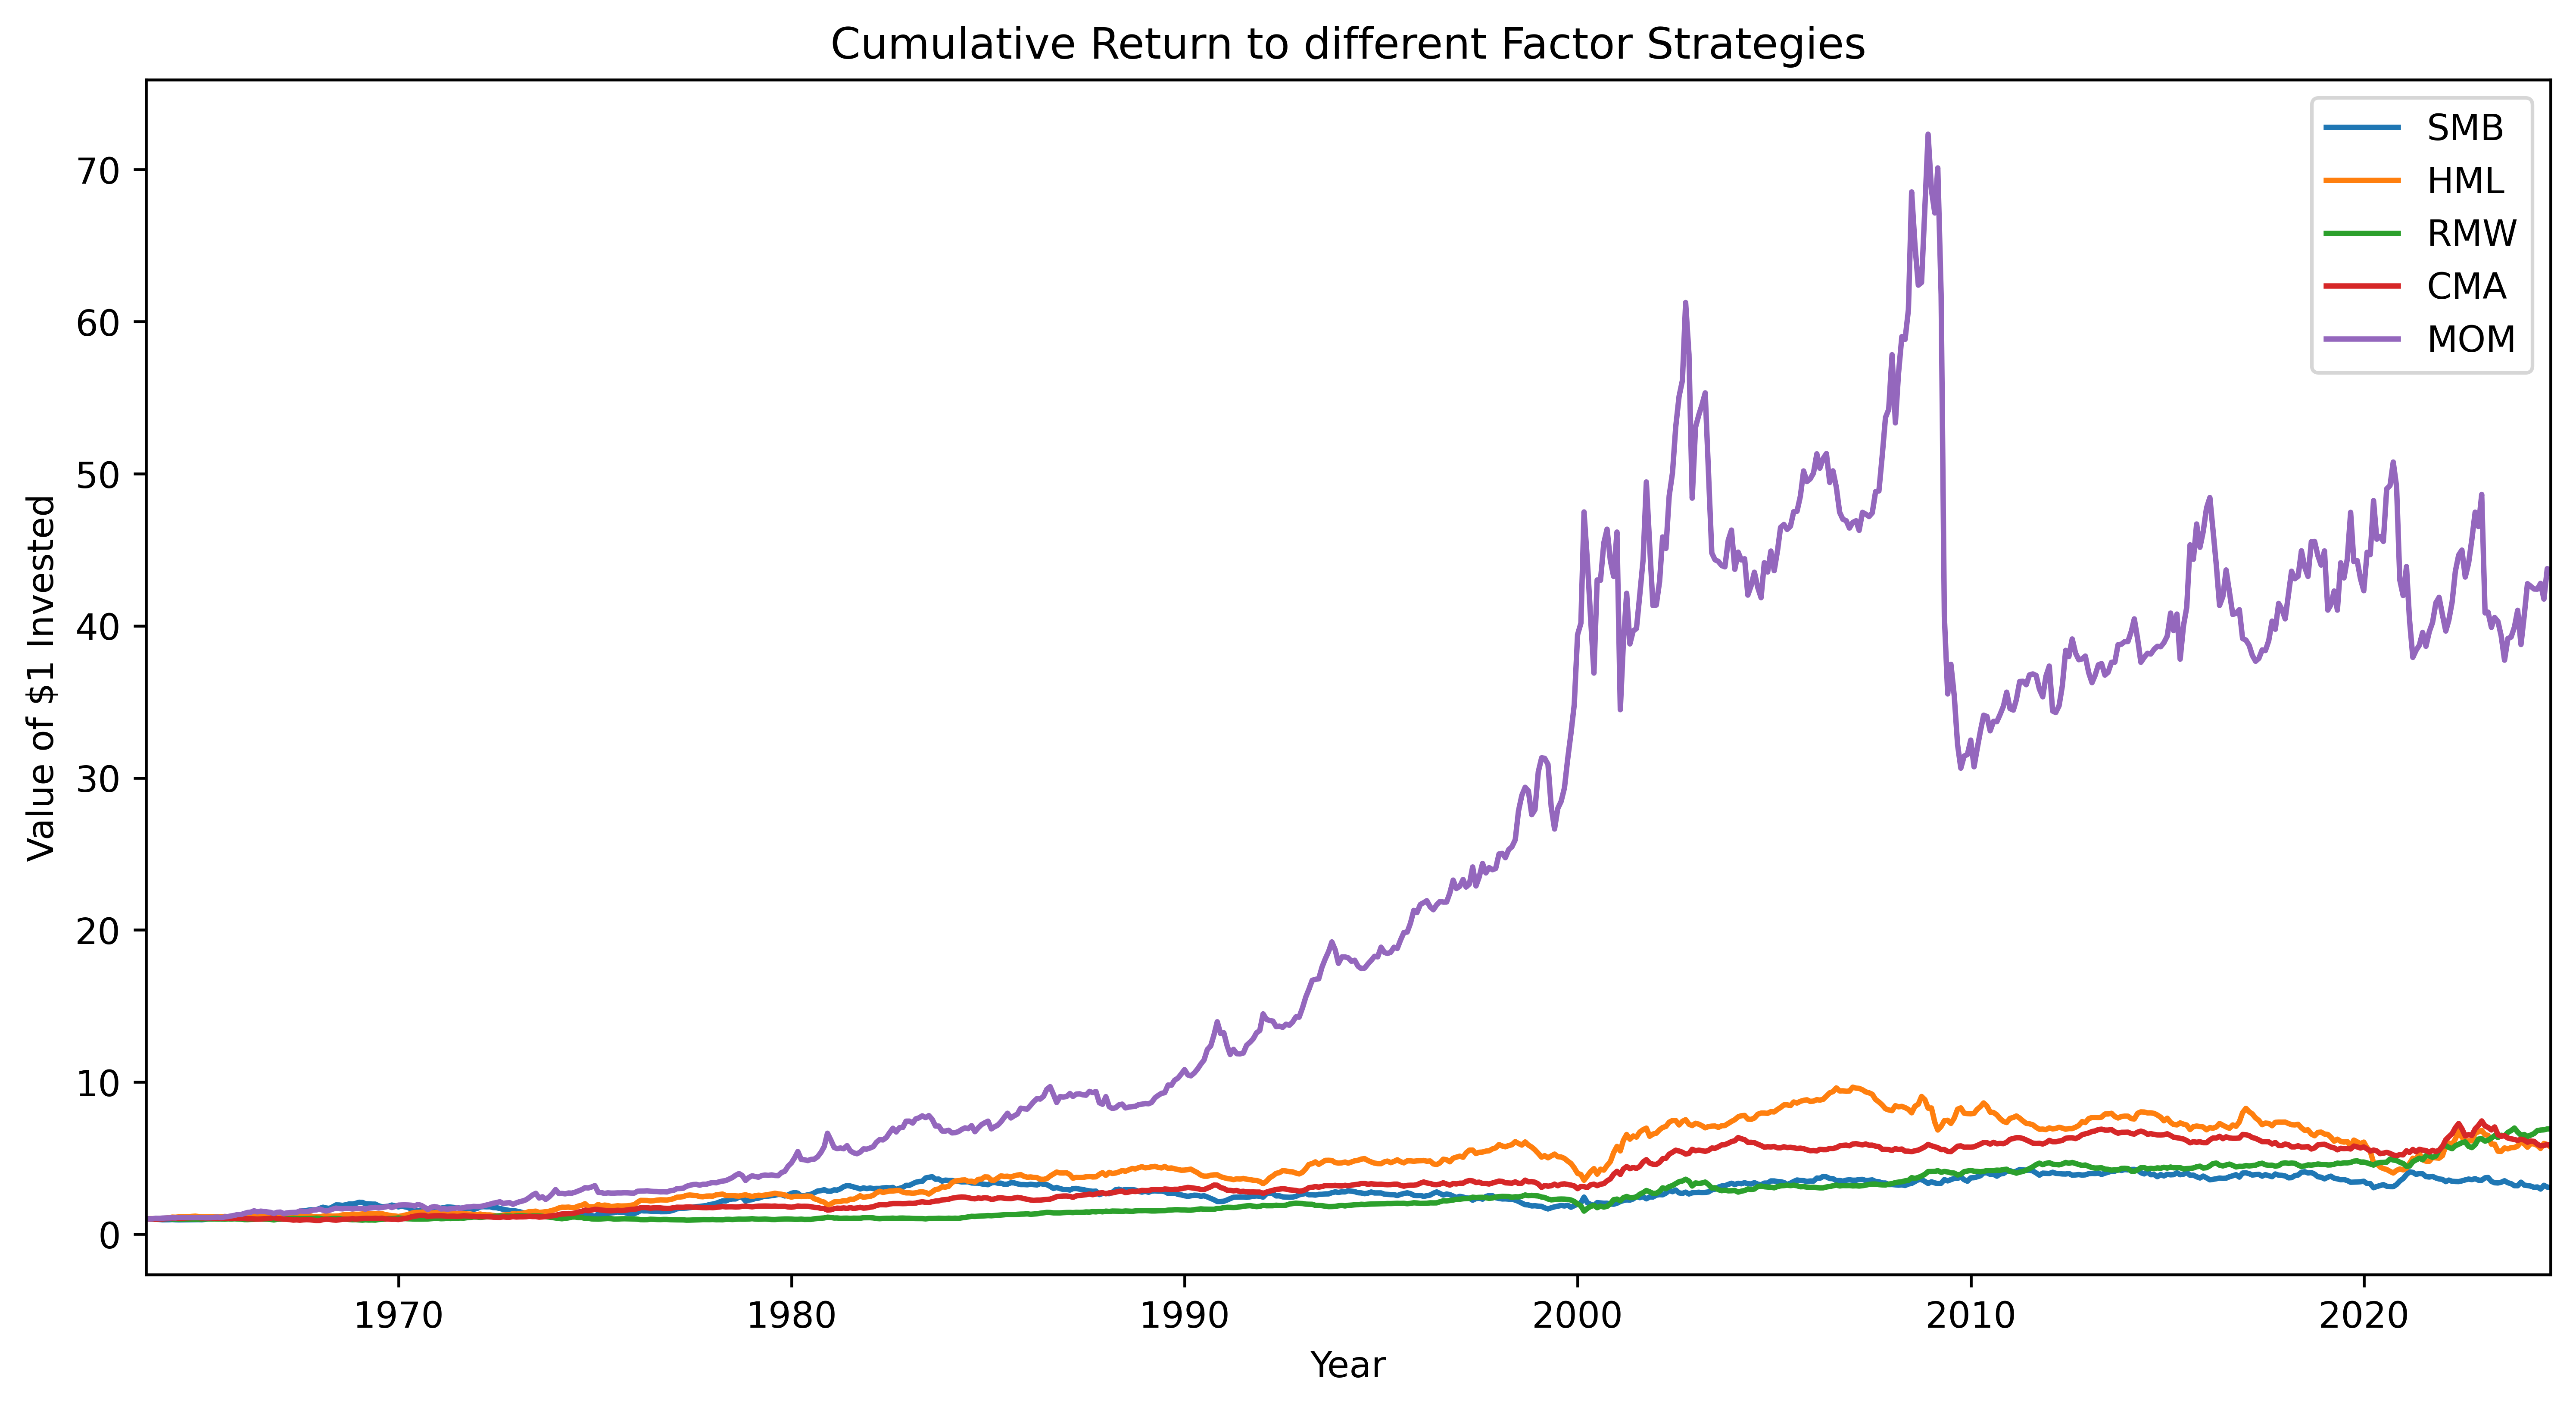

In [ ]:
plt.figure(figsize=(12, 6), dpi=600)

for factor in factors:
    plt.plot(data["Date"], data[f"Cumulative_{factor}"], label = factor)

plt.title("Cumulative Return to different Factor Strategies")
plt.xlabel("Year")
plt.ylabel("Value of $1 Invested")

plt.legend()

plt.xlim([data["Date"].min(), data["Date"].max()])

plt.grid(False)
plt.show()